In [1]:
%load_ext autoreload

# Short-Time Fourier Transformation

In [9]:
%matplotlib inline
import os, sys
import numpy as np
import pandas as pd
sys.path.append(os.path.abspath(os.path.join('../..')))

from database.CERNMongoClient import CERNMongoClient
from preprocessing import feature_extraction, fourier_transform

db = CERNMongoClient()

# auto-load changes in imported modules
%autoreload 2

## Setup

The Fourier transform can be precise in time or in frequency, but not both. This is why every collection is tested twice.

In [1]:
# time
fs_t = 400  # Sampling rate
frame_size_t = 0.025  # frame size (window) of 0.025
hop_t = 0.0025  # hop size of 0.0025

# frequency
fs_f = 400
frame_size_f = 0.5
hop_f = 0.25

The frame size and hop will be multiplied with the frequency.
This gives for the time parameters:
* frame of 10 minutes
* hop of 1 minute
The frame is the window over which the fourier transform will be calculated.
The hop is how much the window is moved for every next fourier transform.

And for the frequency parameters:
* frame of 200 minutes
* hop of 100 minutes

## Pressure

In [6]:
df = db.query("^MKI.A.*B1:PRESSURE$", resample_to='1min', filters=True)
# convert datetimes to unix timestamps?
# t = (pd.to_datetime(pd.Series(df.index), unit="s") - datetime(1970,1,1)).dt.total_seconds()
# equivalent result:
t = pd.Series(df.index.astype(np.int64) / 10**9)
data = df.iloc[:, 0].values
t_min = t.iloc[0]
t_max = t.iloc[-1]
display(df.shape, data, len(data))

Fetching data for pattern ^MKI.A.*B1:PRESSURE$ from 2016-03-10 00:00:00 to 2017-09-24 00:00:00



(810712, 1)

array([1.0e-11, 1.0e-11, 1.0e-11, ..., 1.6e-11, 1.6e-11, 1.5e-11])

810712

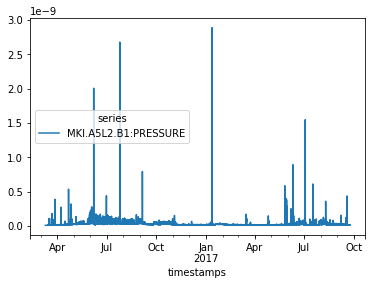

In [7]:
df.plot()

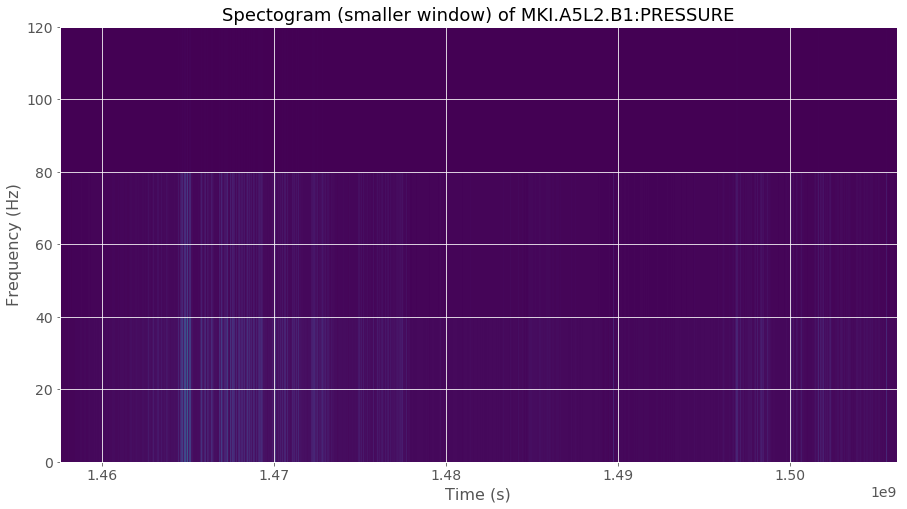

In [10]:
stft = fourier_transform.stft(data, fs_t, frame_size_t, hop_t)
fourier_transform.plot_spectogram(stft, t_min, t_max, fs_t, frame_size_t, "Spectogram (smaller window) of MKI.A5L2.B1:PRESSURE")

In [13]:
display(len(stft))
display(stft[0])
display(stft[0][5])
type(stft[0][5])

8106

array([ 9.95000000e-10+0.00000000e+00j, -5.01170684e-10-7.87301824e-12j,
        1.68802086e-12+5.30481925e-14j,  6.31157726e-13+2.97646428e-14j,
        3.36031782e-13+2.11413277e-14j,  2.09655600e-13+1.65002536e-14j,
        1.43484097e-13+1.35632405e-14j,  1.04391098e-13+1.15248845e-14j,
        7.93348269e-14+1.00223194e-14j,  6.22981340e-14+8.86633744e-15j,
        5.01819755e-14+7.94804410e-15j,  4.12547998e-14+7.20011518e-15j,
        3.44862015e-14+6.57859478e-15j,  2.92313536e-14+6.05352232e-15j,
        2.50697429e-14+5.60375145e-15j,  2.17175365e-14+5.21391922e-15j,
        1.89774817e-14+4.87258912e-15j,  1.67090117e-14+4.57106835e-15j,
        1.48097472e-14+4.30262931e-15j,  1.32036809e-14+4.06198264e-15j,
        1.18334207e-14+3.84491147e-15j,  1.06549715e-14+3.64801213e-15j,
        9.63414805e-15+3.46850673e-15j,  8.74406121e-15+3.30410540e-15j,
        7.96332505e-15+3.15290343e-15j,  7.27475796e-15+3.01330341e-15j,
        6.66442804e-15+2.88395554e-15j,  6.12094218

(2.0965559983932483e-13+1.6500253552687434e-14j)

numpy.complex128

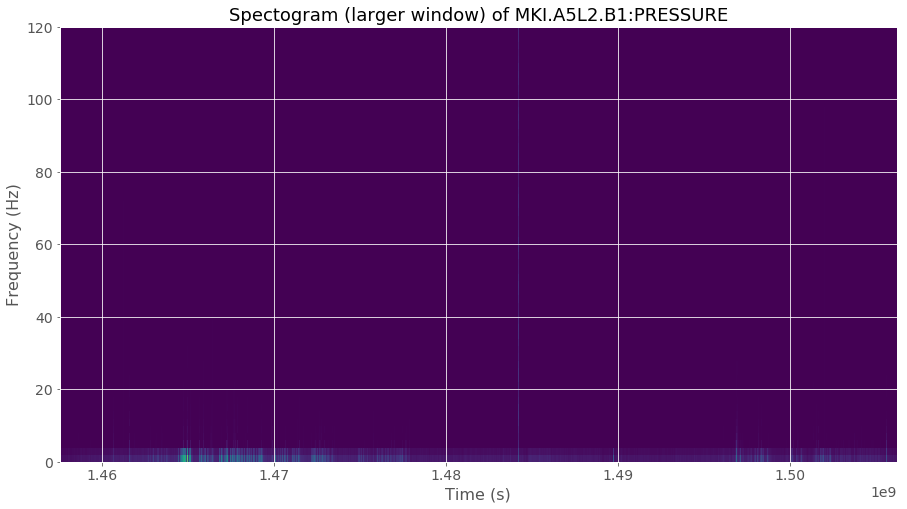

In [14]:
stft = fourier_transform.stft(data, fs_f, frame_size_f, hop_f)
fourier_transform.plot_spectogram(stft, t_min, t_max, fs_f, frame_size_f, "Spectogram (larger window) of MKI.A5L2.B1:PRESSURE")

## Temperature Magnet Up

In [15]:
df = db.query("^MKI.A.*B1:TEMP_MAGNET_UP$", resample_to='1min', filters=True)
t = pd.Series(df.index.astype(np.int64) / 10**9)
data = df.iloc[:, 0].values
t_min = t.iloc[0]
t_max = t.iloc[-1]

Fetching data for pattern ^MKI.A.*B1:TEMP_MAGNET_UP$ from 2016-03-10 00:00:00 to 2017-09-24 00:00:00



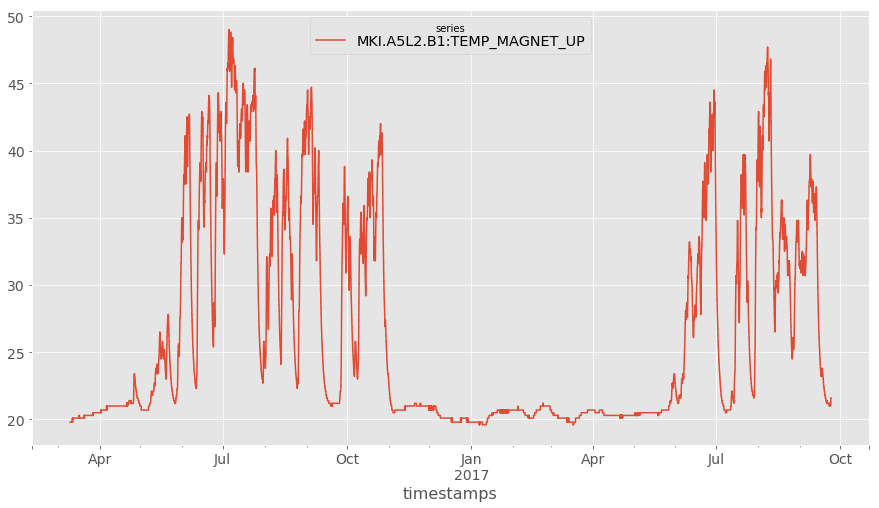

In [16]:
df.plot()

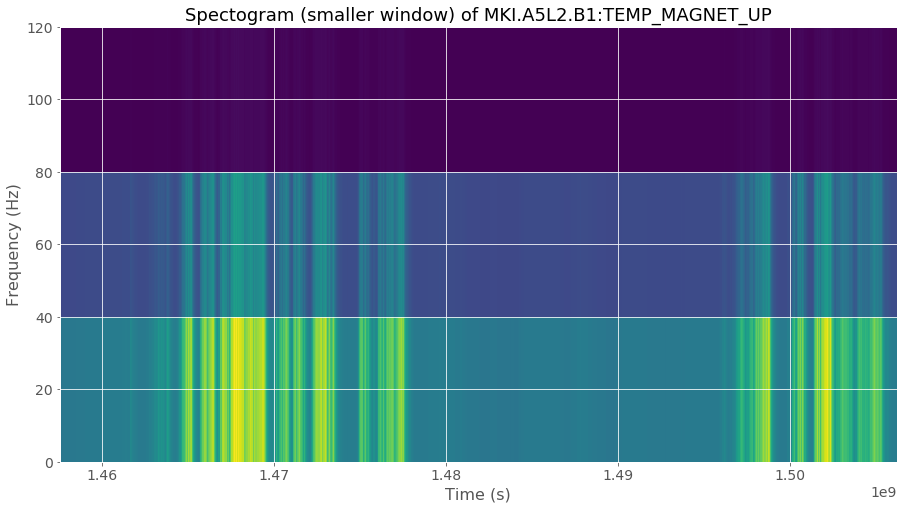

In [17]:
stft = fourier_transform.stft(data, fs_t, frame_size_t, hop_t)
fourier_transform.plot_spectogram(stft, t_min, t_max, fs_t, frame_size_t, "Spectogram (smaller window) of MKI.A5L2.B1:TEMP_MAGNET_UP")

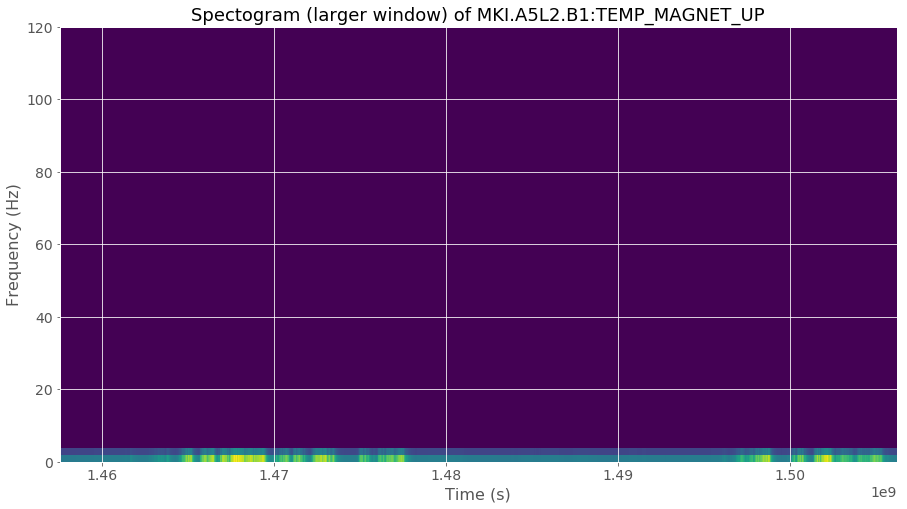

In [18]:
stft = fourier_transform.stft(data, fs_f, frame_size_f, hop_f)
fourier_transform.plot_spectogram(stft, t_min, t_max, fs_f, frame_size_f, "Spectogram (larger window) of MKI.A5L2.B1:TEMP_MAGNET_UP")

## Temperature Magnet Down

In [19]:
df = db.query("^MKI.A.*B1:TEMP_MAGNET_DOWN$", resample_to='1min', filters=True)
t = pd.Series(df.index.astype(np.int64) / 10**9)
data = df.iloc[:, 0].values
t_min = t.iloc[0]
t_max = t.iloc[-1]

Fetching data for pattern ^MKI.A.*B1:TEMP_MAGNET_DOWN$ from 2016-03-10 00:00:00 to 2017-09-24 00:00:00



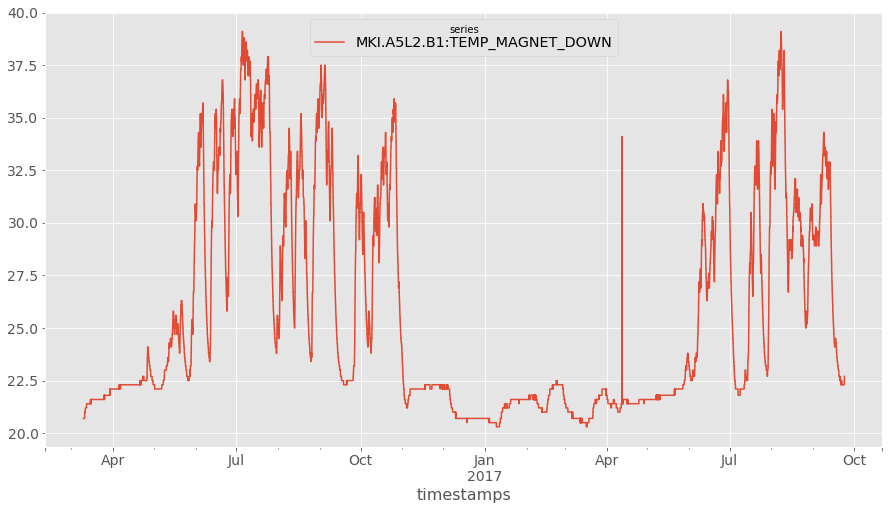

In [20]:
df.plot()

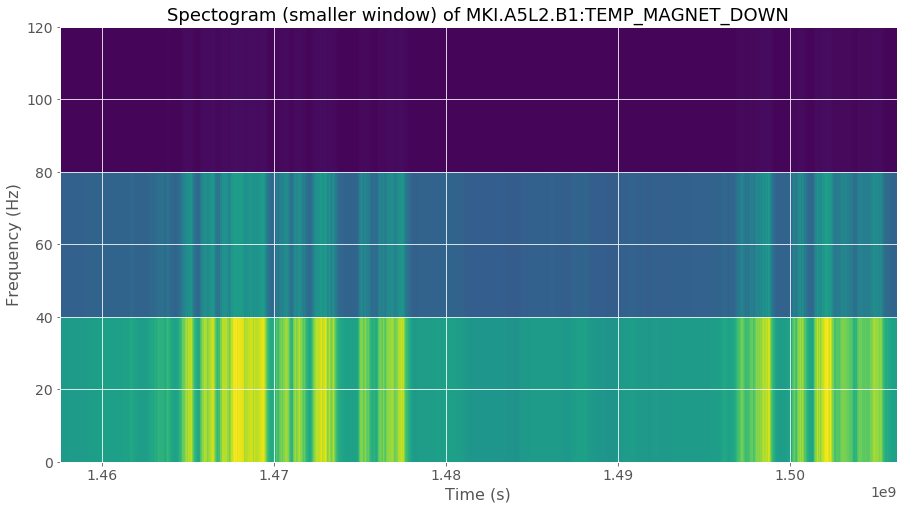

In [21]:
stft = fourier_transform.stft(data, fs_t, frame_size_t, hop_t)
fourier_transform.plot_spectogram(stft, t_min, t_max, fs_t, frame_size_t, "Spectogram (smaller window) of MKI.A5L2.B1:TEMP_MAGNET_DOWN")

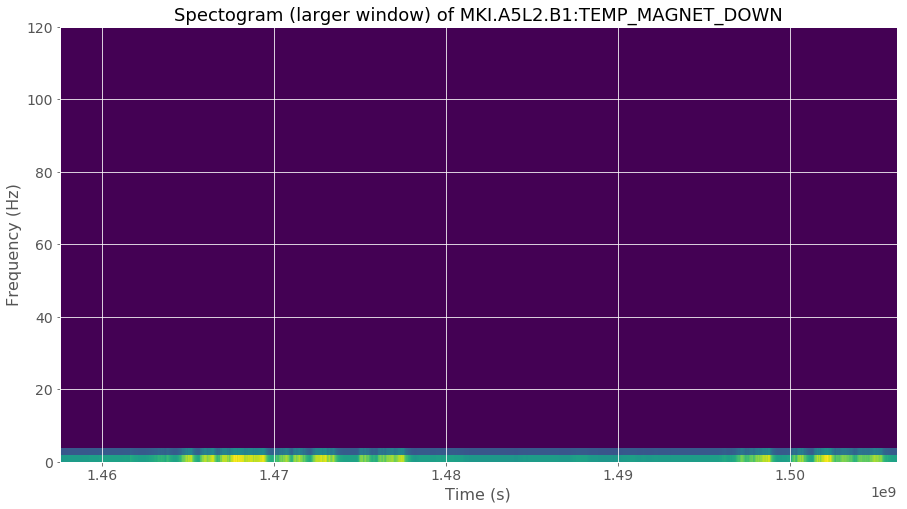

In [22]:
stft = fourier_transform.stft(data, fs_f, frame_size_f, hop_f)
fourier_transform.plot_spectogram(stft, t_min, t_max, fs_f, frame_size_f, "Spectogram (larger window) of MKI.A5L2.B1:TEMP_MAGNET_DOWN")

## Temperature Magnet Down filtered

Fetching data for pattern ^MKI.A.*B1:TEMP_MAGNET_DOWN$ from 2016-03-10 00:00:00 to 2017-09-24 00:00:00



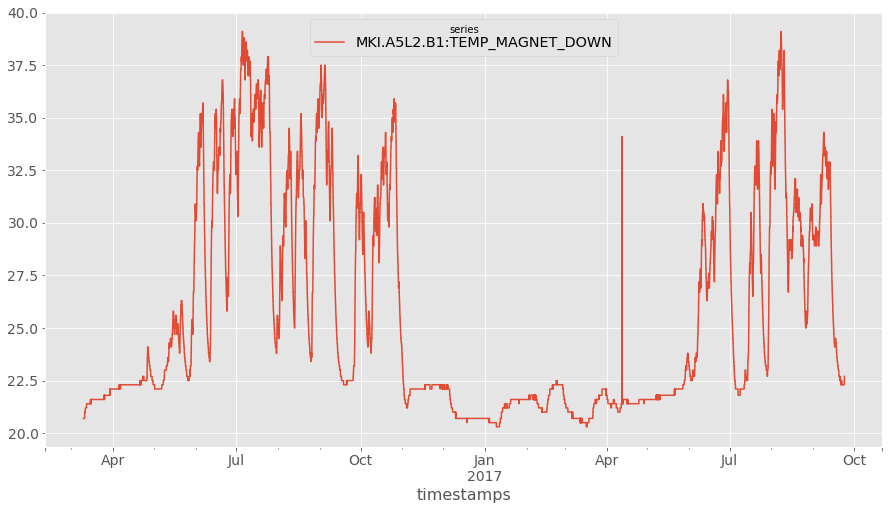

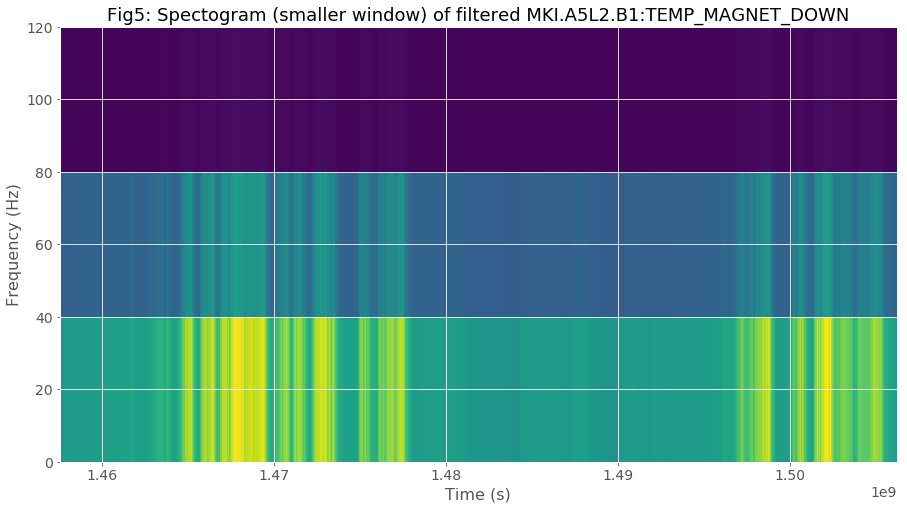

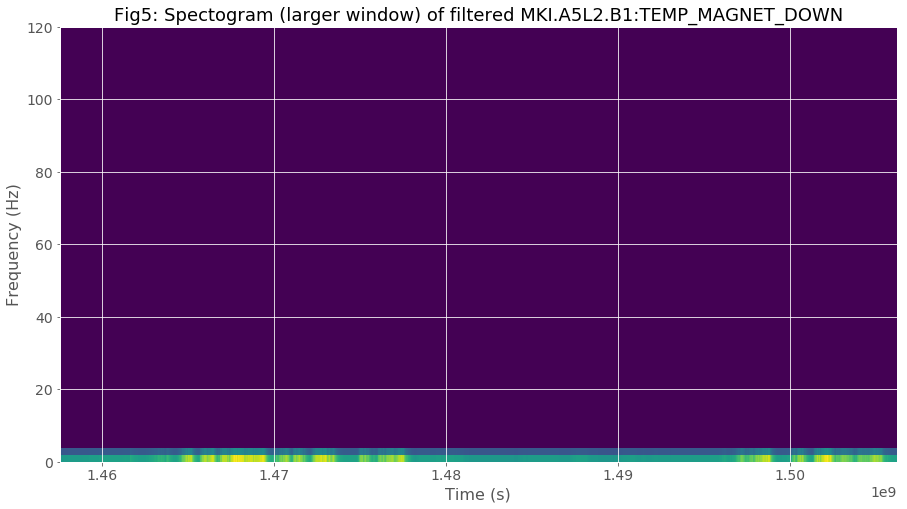

In [23]:
df = db.query("^MKI.A.*B1:TEMP_MAGNET_DOWN$", resample_to='1min', filters=True)
t = pd.Series(df.index.astype(np.int64) / 10**9)
data = df.iloc[:, 0].values
t_min = t.iloc[0]
t_max = t.iloc[-1]

df.plot()

stft = fourier_transform.stft(data, fs_t, frame_size_t, hop_t)
fourier_transform.plot_spectogram(stft, t_min, t_max, fs_t, frame_size_t, "Fig5: Spectogram (smaller window) of filtered MKI.A5L2.B1:TEMP_MAGNET_DOWN")

stft = fourier_transform.stft(data, fs_f, frame_size_f, hop_f)
fourier_transform.plot_spectogram(stft, t_min, t_max, fs_f, frame_size_f, "Fig5: Spectogram (larger window) of filtered MKI.A5L2.B1:TEMP_MAGNET_DOWN")